In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('one_year.csv')

In [3]:
df["Customer Order Number"].count()

9894

In [4]:
df_invoice = pd.read_csv('invoice.csv')

In [5]:
df_invoice.head()

,Action (Transaction),Merchant (Order),Vendor SKU (Order Line),Merchant SKU (Order Line),UPC (Order Line),PO Number (Order),Insert Date (Order),Order Date (Order),Invoice Date (Transaction),Invoice Number (Transaction),Invoice Unit Cost (Transaction Line),Invoice Unit Cost Currency (Transaction Line),Invoice Total (Transaction),Invoice Total Currency (Transaction)
0,Ship,Macy's,NaN,NaN,6.862500e+11,38371305,5/25/2021,5/25/2021,NaN,NaN,8.18,USD,0.0,USD
1,Ship,Macy's,NaN,NaN,6.862500e+11,38371305,5/25/2021,5/25/2021,NaN,NaN,8.18,USD,0.0,USD
2,Ship,Macy's,NaN,NaN,8.541300e+11,38346698,5/25/2021,5/25/2021,NaN,NaN,9.60,USD,0.0,USD
3,Ship,Macy's,NaN,NaN,6.862500e+11,38371382,5/25/2021,5/25/2021,NaN,NaN,8.18,USD,0.0,USD
4,Ship,Macy's,NaN,NaN,6.862500e+11,38371382,5/25/2021,5/25/2021,NaN,NaN,8.18,USD,0.0,USD


In [6]:
df_invoice['Invoice Unit Cost (Transaction Line)'].count()

24540

In [7]:
df_invoice['Invoice Unit Cost (Transaction Line)'].sum()

237804.94

In [8]:
df_invoice["PO Number (Order)"].nunique()

9850

In [9]:
df_unique = df_invoice.drop_duplicates(subset=["PO Number (Order)"])

In [10]:
df_unique["PO Number (Order)"].count()

9850

In [11]:
df_unique['Invoice Unit Cost (Transaction Line)'].sum()

96362.85

## Variables

### Costs

In [12]:
# CartRover Testing
crt = 595
# CartRover Monthly
crm = 49
# CommerceHub upgrade (max) if VAN
chmax = 2250
# Montly charge if VAN
chmon = 20
# CommerceHub upgrade (min)
chmin = 1750

### Savings

In [13]:
# Orders from May 21 to May 22
yearly_orders = 9850
# Total Macy's Sales May 21 to May 22
yearly_sales = 96362.85
# Angela's overtime rate per minute
otr = 17/60
# monthly time spent assuming one minute per order
mor = (yearly_orders/12)
# Angela's cost times orders (per month)
ac = otr*mor

## Potential Additonal Cost
    - EDI VAN Processing: $ 0.06 per Kilo-character
    - (Data transfer charges if an EDI VAN is required to transfer Subscriber’s data.)
    - AS2: $ 500.00 one-time setup (per Partner ID)+ additional $20.00 per month (per Partner ID)   
    - Alternate communication and reconfiguration:  $ 500.00


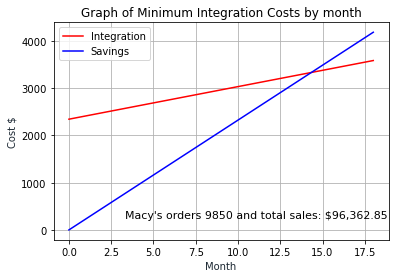

In [14]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,18,250)
y = (chmon+crm)*x+chmin+crt
plt.plot(x, y, '-r', label='Integration')
plt.title('Graph of Minimum Integration Costs by month')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')

a = np.linspace(0,18,250)
b = ac*a
plt.plot(a, b, '-b', label='Savings')
# plt.title('Graph of Integration Costs by month')
plt.xlabel('Month')
plt.ylabel('Cost $')
plt.legend(loc='upper left')

# pyplot.figtext(x, y, string)
plt.figtext(0.29, 0.2, f"Macy's orders {yearly_orders} and total sales: ${yearly_sales:,}", fontsize = 11)

plt.grid()
plt.show()

## Assuming VAN costs from CommerceHub

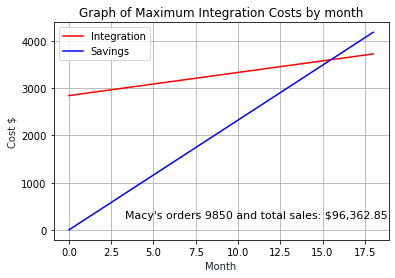

In [15]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,18,250)
y = crm*x+chmax+crt
plt.plot(x, y, '-r', label='Integration')
plt.title('Graph of Maximum Integration Costs by month')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')

a = np.linspace(0,18,250)
b = ac*a
plt.plot(a, b, '-b', label='Savings')
# plt.title('Graph of Integration Costs by month')
plt.xlabel('Month')
plt.ylabel('Cost $')
plt.legend(loc='upper left')

# pyplot.figtext(x, y, string)
plt.figtext(0.29, 0.2, f"Macy's orders {yearly_orders} and total sales: ${yearly_sales:,}", fontsize = 11)

plt.grid()
plt.show()

### Charts measure orders from May '21 to May '22